# 1. Definición del problema 🎯

El **dataset** que utilizaremos es de **Kaggle**, un gran lugar para conseguir **datasets** para tus estudios en Ciencia de Datos e Inteligencia Artificial

El **dataset** es sobre una recolección de datos acerca de vino rojo de las cuales tiene variables como su densidad, pH, clóridos, entre otros. Puedes descargarlo [aquí](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) en **Kaggle**. El objetivo de este **dataset** es **agrupar** a los vinos en distintos clusters basados en algún criterio encontrado durante la investigación.

# 2. Preparación de los datos 💿 🧑🏻‍💻

## 2.1 Configuración inicial 👨🏻‍💻

In [ ]:
# Core
import pandas as pd
import numpy as np
import warnings
from IPython.display import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

# Ignore Warnings
warnings.filterwarnings('ignore')

## 2.2 Obtención de los datos 💿💻

In [ ]:
# Cargamos nuestro dataset
red = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/wine/winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


## 2.3 Limpieza de los datos 📁🧹

In [ ]:
# Dimensiones
display(red.shape)

(1599, 12)

In [ ]:
# Datos faltantes
display(red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Tipos de variables del dataset
display(red.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# 3. Análisis exploratorio de los datos 🔎👾

## 3.1 Resumen estadístico 📄📈

In [ ]:
# Resumen de nuestro dataset
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00"
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [ ]:
# Frecuencia de las cantidades
red['quality'].value_counts().sort_values(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## 3.2 Diagramas de frecuencia 📊

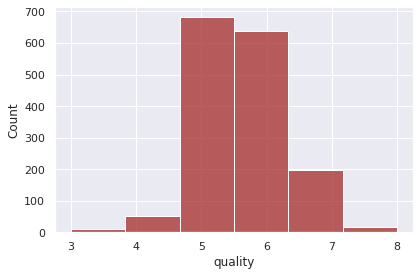

In [ ]:
# Histplot
%matplotlib inline
sns.set_theme(style='darkgrid')
sns.histplot(data=red['quality'], bins=6, color='brown')
plt.tight_layout();

In [ ]:
# Agrupamos para observar información de forma clara
red.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.36,0.88,0.17,2.64,0.12,11.00,24.90,1.00,3.40,0.57,9.96
4,7.78,0.69,0.17,2.69,0.09,12.26,36.25,1.00,3.38,0.60,10.27
5,8.17,0.58,0.24,2.53,0.09,16.98,56.51,1.00,3.30,0.62,9.90
6,8.35,0.50,0.27,2.48,0.08,15.71,40.87,1.00,3.32,0.68,10.63
7,8.87,0.40,0.38,2.72,0.08,14.05,35.02,1.00,3.29,0.74,11.47
8,8.57,0.42,0.39,2.58,0.07,13.28,33.44,1.00,3.27,0.77,12.09


Hay un **patrón** marcado, a mejor `quality` del vino rojo mayor es el aumento en `citric acid`, `sulphates` y en `alcohol` además tiene relación inversa con `volatile acidity`, `residual sugar`, `chlorides` y `pH`

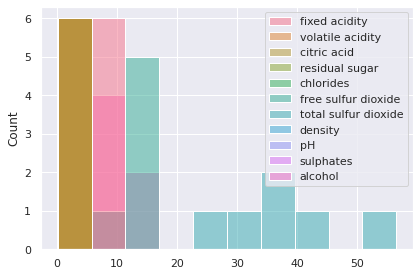

In [ ]:
# Histplot
%matplotlib inline
sns.set_theme(style='darkgrid')
sns.histplot(data=red.groupby('quality').mean(), bins=10)
plt.tight_layout();

## 3.3 Selección de features 👉🏻💯

### Normalización

In [ ]:
# Normalización
X = red
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,0.40
1,0.28,0.52,0.00,0.12,0.14,0.34,0.22,0.49,0.36,0.21,0.22,0.40
2,0.28,0.44,0.04,0.10,0.13,0.20,0.17,0.51,0.41,0.19,0.22,0.40
3,0.58,0.11,0.56,0.07,0.11,0.23,0.19,0.58,0.33,0.15,0.22,0.60
4,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,0.40


# 4. Modelamiento 🧠🤖

In [ ]:
# Importamos K-Means
from sklearn.cluster import KMeans

Queremos confirmar el número **óptimo** de **clusters** de nuestro estudio, para agruparlos de la mejor manera

## 4.1 Selección del modelo 👉🏻🤖 

### Codo de Jambú

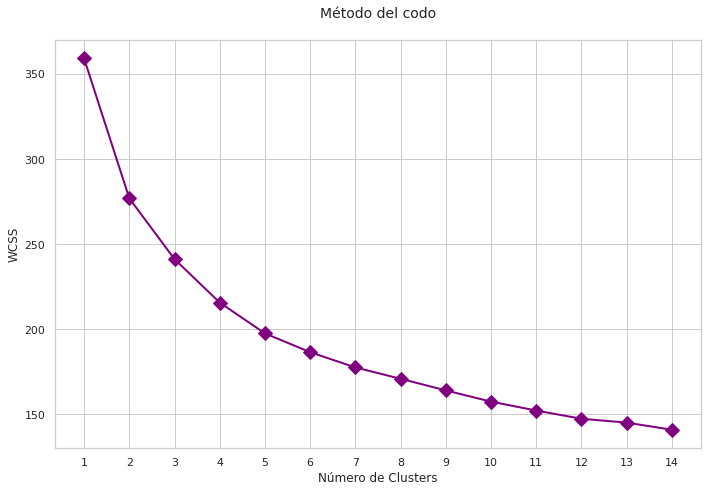

In [ ]:
"""
1. Método del codo
2. Buscamos el 'k' óptimo
3. Vemos el valor de la Inertia
4. Graficamos
"""

wcss = []

for i in list(range(1,15)):

    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(X_norm)
    wcss.append(k_means.inertia_)


sns.set_theme(style='whitegrid')
plt.subplots(figsize=(10,7))
plt.plot(list(range(1,15)), wcss, marker='D', markersize=10, color='purple', linewidth=2)
plt.title('Método del codo\n', fontsize=14)
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(list(range(1,15)))
plt.tight_layout();

### Dendrograma

In [ ]:
"""
1. Importamos linkage y dendrograma
2. A la función linkage, le pasamos como parámetros a los datos de manera normalizada y el método ward
"""

from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_norm, 'ward')
Z

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.50000000e+02, 7.51000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.17900000e+03, 3.19100000e+03, 6.43793061e+00, 5.37000000e+02],
       [3.19200000e+03, 3.19300000e+03, 8.26055739e+00, 1.06200000e+03],
       [3.19400000e+03, 3.19500000e+03, 1.20043330e+01, 1.59900000e+03]])

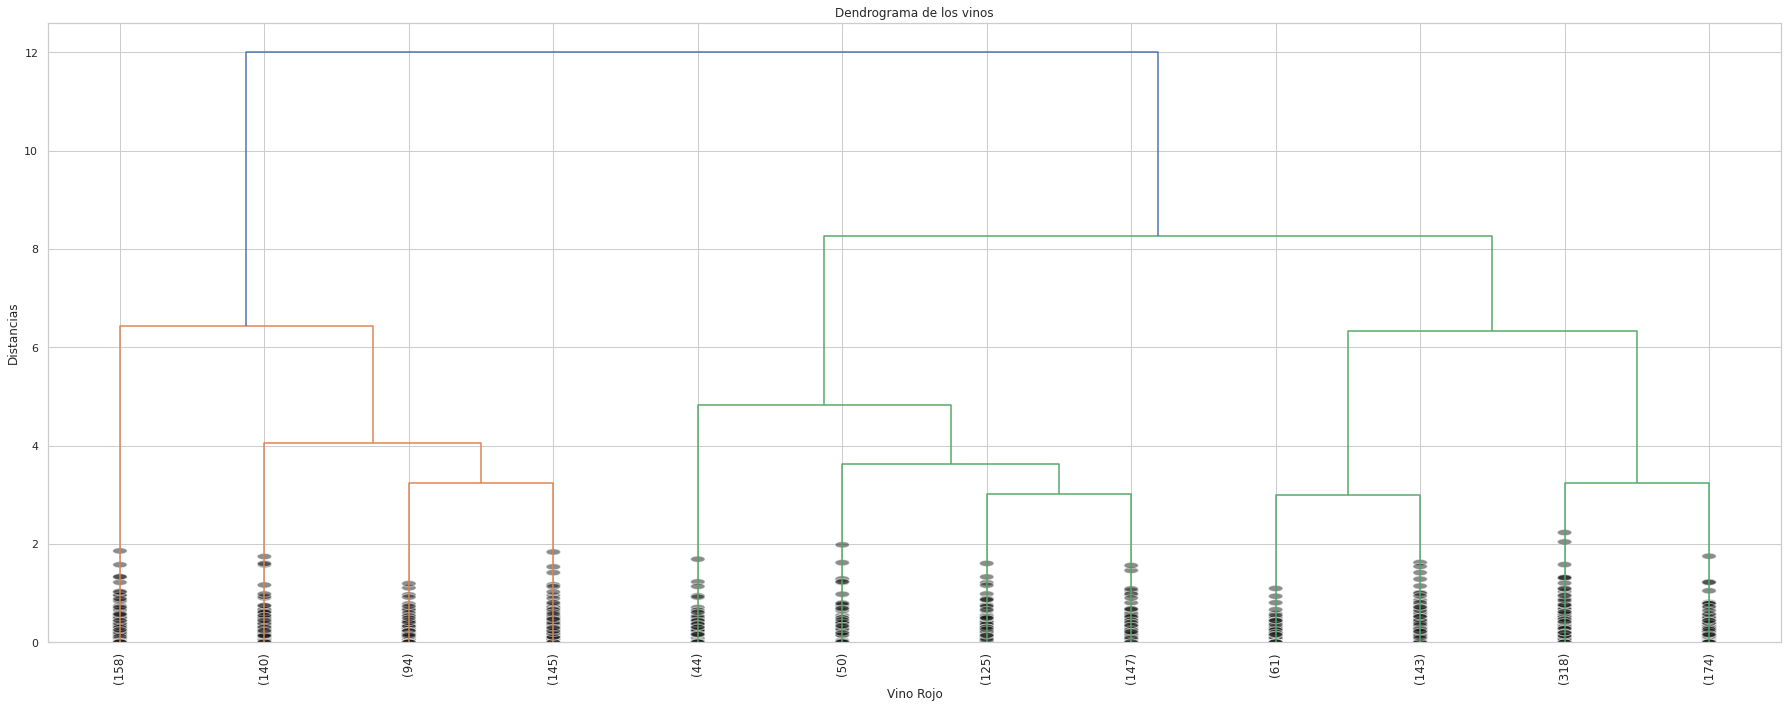

In [ ]:
# Dendrograma
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("Vino Rojo")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, truncate_mode="lastp", p=12,
             show_leaf_counts=True, show_contracted=True)
plt.tight_layout();

## 4.2 Entrenamiento del modelo 🦾🤖

In [ ]:
"""
1. Instanciamos y definimos el número de clusters
2. Entrenamos el modelo con los datos normalizados
"""

k_means = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
k_means = k_means.fit(X_norm)

In [ ]:
# Centroides
k_means.cluster_centers_

array([[0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451, 0.46428571],
       [0.17610619, 0.32432996, 0.08913043, 0.09416319, 0.09608042,
        0.24856093, 0.12292211, 0.32587627, 0.57733653, 0.18516011,
        0.48637681, 0.61043478],
       [0.36290046, 0.15975098, 0.42329457, 0.10547414, 0.10543412,
        0.16350038, 0.08386063, 0.40849071, 0.41863517, 0.23557536,
        0.49129398, 0.69689922],
       [0.31657408, 0.27714878, 0.30457413, 0.15202455, 0.12698872,
        0.38048163, 0.29785645, 0.5390477 , 0.43592737, 0.17890402,
        0.21400954, 0.45615142],
       [0.57666747, 0.20368051, 0.50645914, 0.131816  , 0.1305873 ,
        0.13722804, 0.09139157, 0.6528223 , 0.3351512 , 0.22556444,
        0.29055173, 0.54941634],
       [0.26393936, 0.35883548, 0.12363458, 0.09137578, 0.12364419,
        0.14473284, 0.1075274 , 0.49211549, 0.48625528, 0.1557945 ,
        0.22036673,

## 4.3 Predicción del modelo 📈📉

In [ ]:
# Predicción
y_pred = k_means.fit_predict(X_norm)
y_pred

array([5, 5, 5, ..., 1, 1, 2], dtype=int32)

## 4.4 Etiquetamos los resultados obtenidos

In [ ]:
# Definimos nuestras etiquetas en un objeto para posteriormente almacenarlo en los datos normalizados
etiquetas_kmeans = k_means.labels_
etiquetas_kmeans

array([5, 5, 5, ..., 1, 1, 2], dtype=int32)

In [ ]:
# Los incluimos como columnas en el dataframe
X_norm['Labels K-Means'] = etiquetas_kmeans

In [ ]:
X_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Labels K-Means
0,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,0.40,5
1,0.28,0.52,0.00,0.12,0.14,0.34,0.22,0.49,0.36,0.21,0.22,0.40,5
2,0.28,0.44,0.04,0.10,0.13,0.20,0.17,0.51,0.41,0.19,0.22,0.40,5
3,0.58,0.11,0.56,0.07,0.11,0.23,0.19,0.58,0.33,0.15,0.22,0.60,4
4,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,0.40,5


In [ ]:
# Etiquetas basada en cada uno de los clusters
display(X_norm['Labels K-Means'].value_counts().sort_values(ascending=False))

5    509
3    317
2    258
4    257
1    230
0     28
Name: Labels K-Means, dtype: int64

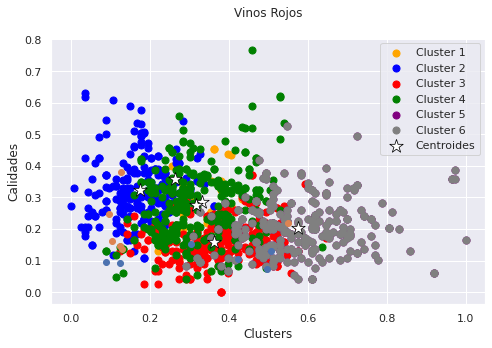

In [ ]:
# Visualización de los clusters

X = np.array(X_norm)

sns.set_theme(style='darkgrid')
plt.subplots(figsize=(7,5))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = "orange", label = "Cluster 1")
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = "blue", label = "Cluster 2")
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = "red", label = "Cluster 3")
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 50, c = "green", label = "Cluster 4")
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = "purple", label = "Cluster 5")
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = "gray", label = "Cluster 6")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], marker='*', s = 200, linewidths=0.75, edgecolors='black', alpha=1, c = 'white', label = "Centroides")
plt.scatter(k_means.cluster_centers_[:,2], k_means.cluster_centers_[:,3])
plt.scatter(k_means.cluster_centers_[:,4], k_means.cluster_centers_[:,5])
plt.title("Vinos Rojos\n")
plt.xlabel("Clusters")
plt.ylabel("Calidades")
plt.legend()
plt.tight_layout();

# 5. Evaluación del modelo 💻🤖

## 5.1 Evaluamos las métricas del modelo

In [ ]:
""""
1. Importamos las métricas
2. Evaluamos nuestro modelo
"""
# Importamos las métricas
from sklearn import metrics

# Métricas
display(f'Silhouette Score: {metrics.silhouette_score(X_norm, y_pred)*100}%')

'Silhouette Score: 62.84897667647661%'

In [ ]:
# Predicciones basada en cada uno de los clusters
y_pred = pd.DataFrame(y_pred)
display(y_pred.value_counts().sort_values(ascending=False))

5    509
3    317
2    258
4    257
1    230
0     28
dtype: int64

In [ ]:
# Exportamos nuestros datos a Excel
X_norm.to_csv(r'/work/Proyectos de Machine Learning/red_wines.csv', index=False)

# 6. Conclusiones 📋🖊

- Llevamos a cabo un estudio con la **técnica de EDA (Exploratory Data Analysis)**.
- Pudimos encontrar patrones en las **visualizaciones**.
- Encontramos el k **óptimo** para nuestro modelo, utilizando distintos métodos como el **codo de Jambú** y el **dendrograma**.
- **Etiquetamos** a cada uno de los vinos rojos al **cluster** al cual corresponden.
- Validamos el modelo a través de distintas **métricas**.

# 7. Trabajo finalizado 📄✔

![link text](https://media.giphy.com/media/fDzM81OYrNjJC/source.gif?cid=ecf05e471mkgebs0ci5cquqshmfeg7fbpcbmws5rspjgh31e&rid=source.gif&ct=g)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>